In [84]:
import pandas as pd 
import matplotlib.pyplot as plt

In [85]:
train_data='data/SET-MACD-Daily/SET-Daily-Y1_21-MACD-TrainData.csv'
predict_data='data/SET-MACD-Daily/bquxjob_1bfb08e8_1842492f8af.csv'

In [86]:
dfTrain=pd.read_csv(f'{train_data}')
dfTrain['DateTime']=pd.to_datetime(dfTrain['DateTime'],format='%Y-%m-%d')
print(dfTrain.info())
dfTrain.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DateTime           2441 non-null   datetime64[ns]
 1   MACD               2441 non-null   float64       
 2   TrendMACD          2441 non-null   float64       
 3   SIGNAL             2441 non-null   float64       
 4   TrendSIGNAL        2441 non-null   float64       
 5   Trend_MACD_SIGNAL  2441 non-null   float64       
 6   RSI                2441 non-null   float64       
 7   TrendRSI           2441 non-null   float64       
 8   Trend_MACD_RSI     2441 non-null   float64       
 9   Close              2441 non-null   float64       
 10  MiddleHL           2441 non-null   float64       
 11  Close-MiddleHL     2441 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 229.0 KB
None


,DateTime,MACD,TrendMACD,SIGNAL,TrendSIGNAL,Trend_MACD_SIGNAL,RSI,TrendRSI,Trend_MACD_RSI,Close,MiddleHL,Close-MiddleHL
0,2012-01-04,5.39,1.0,9.22,1.0,3.0,59.70,1.0,3.0,1036.21,1028.96,1.01
1,2012-01-05,5.42,1.0,8.74,1.0,3.0,59.96,1.0,3.0,1036.80,1028.96,1.01
2,2012-01-06,5.29,1.0,8.31,1.0,3.0,59.59,1.0,3.0,1036.26,1028.96,1.01
3,2012-01-09,5.85,1.0,8.01,1.0,3.0,63.47,1.0,3.0,1044.84,1028.96,1.02
4,2012-01-10,6.88,1.0,7.86,1.0,3.0,66.75,1.0,3.0,1053.04,1028.96,1.02


In [87]:
dfPrediction=pd.read_csv(f'{predict_data}')
dfPrediction['forecast_timestamp']=dfPrediction['forecast_timestamp'].apply( lambda x: x.replace('00:00:00.000000 UTC','').strip() )
dfPrediction['forecast_timestamp']=pd.to_datetime(dfPrediction['forecast_timestamp'],format='%Y-%m-%d')

dfPrediction.rename(columns={'forecast_timestamp':'forecast_date_time'},inplace=True)

print(dfPrediction.info()  )
dfPrediction.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   forecast_date_time               60 non-null     datetime64[ns]
 1   forecast_value                   60 non-null     float64       
 2   standard_error                   60 non-null     float64       
 3   confidence_level                 60 non-null     float64       
 4   prediction_interval_lower_bound  60 non-null     float64       
 5   prediction_interval_upper_bound  60 non-null     float64       
 6   confidence_interval_lower_bound  60 non-null     float64       
 7   confidence_interval_upper_bound  60 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 3.9 KB
None


,forecast_date_time,forecast_value,standard_error,confidence_level,prediction_interval_lower_bound,prediction_interval_upper_bound,confidence_interval_lower_bound,confidence_interval_upper_bound
55,2022-02-24,61.502793,52.597001,0.95,-41.401035,164.406620,-41.401035,164.406620
56,2022-02-25,58.134424,53.095846,0.95,-45.745373,162.014222,-45.745373,162.014222
57,2022-02-26,57.538302,53.590048,0.95,-47.308381,162.384985,-47.308381,162.384985
58,2022-02-27,56.925630,54.079734,0.95,-48.879103,162.730363,-48.879103,162.730363
59,2022-02-28,56.137555,54.565025,0.95,-50.616630,162.891741,-50.616630,162.891741


In [89]:
# dfPrediction=dfPrediction.merge(dfTrain[['DateTime','RSI']],left_on='forecast_date_time',right_on='DateTime')
dfPrediction=dfPrediction.set_index('forecast_date_time')
# dfPrediction[['DateTime','forecast_value','RSI','standard_error','confidence_level']].head()

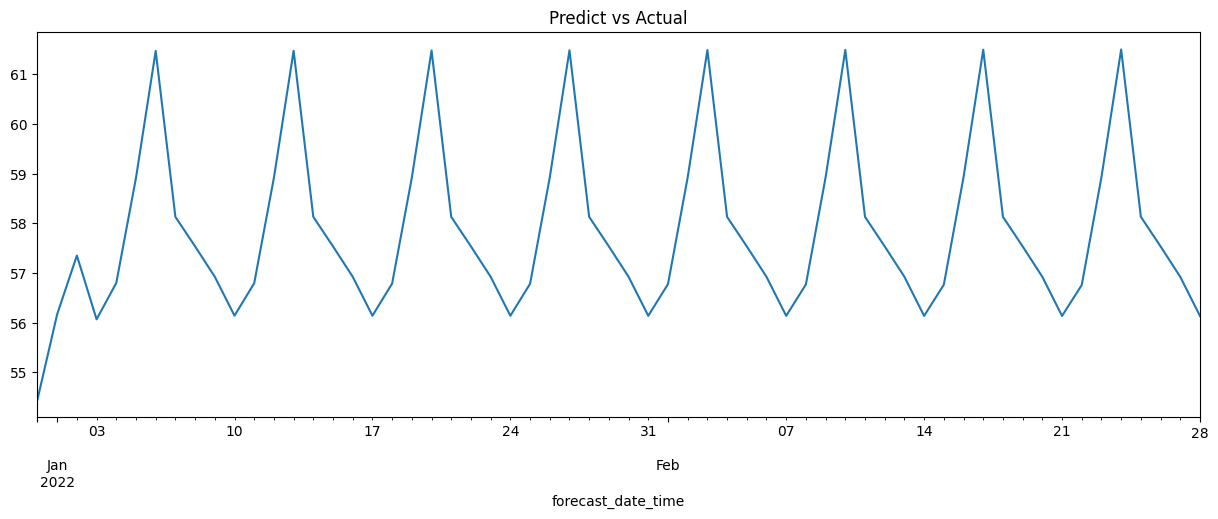

In [90]:
ax = dfPrediction['forecast_value'].plot(figsize=(15, 5), title='Predict vs Actual')
# dfPrediction['RSI'].plot(style='-')
plt.show()